In [64]:
%matplotlib inline

In [65]:
import missingno as msno
import numpy as np 
import pandas as pd
import seaborn as sns
import yellowbrick as yb 
import matplotlib as mpl 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

Let's load the data:

In [66]:
dataset = pd.read_csv("/Users/tamananaheeme/Desktop/fixtures/hmda2013sample.csv")
dataset.head(5)

,action_taken,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_abbr_AK,...,applicant_ethnicity_name_Hispanic or Latino,"applicant_ethnicity_name_Information not provided by applicant in mail, Internet, or telephone application",applicant_ethnicity_name_Not Hispanic or Latino,applicant_ethnicity_name_Not applicable,agency_abbr_CFPB,agency_abbr_FDIC,agency_abbr_FRS,agency_abbr_HUD,agency_abbr_NCUA,agency_abbr_OCC
0,1,117.730003,5180,63.189999,992,1215,79,61300,56,0,...,1,0,0,0,0,0,0,0,1,0
1,1,84.919998,4873,23.070000,1152,1882,128,54900,75,0,...,0,0,1,0,0,0,0,1,0,0
2,0,42.509998,1715,58.480000,346,784,43,68700,38,0,...,0,0,1,0,1,0,0,0,0,0
3,0,106.650002,4071,15.920000,1180,1472,100,67800,65,0,...,0,0,1,0,1,0,0,0,0,0
4,0,88.489998,3001,16.790001,503,330,103,77800,151,0,...,0,0,1,0,1,0,0,0,0,0


### Feature Analysis

In [67]:
# Feature Analysis Imports 
from yellowbrick.features import JointPlotVisualizer
from yellowbrick.features import Rank1D, Rank2D 

In [68]:
features = ['tract_to_msamd_income', 
    'population', 
    'minority_population', 
    'number_of_owner_occupied_units', 
    'number_of_1_to_4_family_units', 
    'loan_amount_000s', 
    'hud_median_family_income', 
    'applicant_income_000s']

target = ['action_taken']

### Rank Features
Rank1D and Rank2D evaluate single features or pairs of features using a variety of metrics that score the features on the scale [-1, 1] or [0, 1] allowing them to be ranked. 

In [69]:
# Specify the features of interest
features = [
    'tract_to_msamd_income', 'population', 'minority_population', 'number_of_owner_occupied_units', 
    'number_of_1_to_4_family_units', 'loan_amount_000s', 'hud_median_family_income', 
    'applicant_income_000s'
        
    ]

# Extract the numpy arrays from the data frame 
X = dataset[features]
y = dataset.action_taken

### Rank 1D (Shapiro Visualizer)

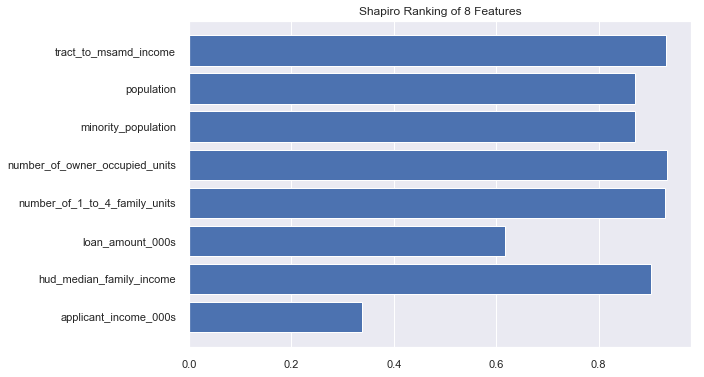

In [70]:
# Instantiate the visualizer with the Covariance ranking algorithm 
visualizer = Rank1D(features=features, algorithm='shapiro')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

### Rank2D (Covariance Visualizer)

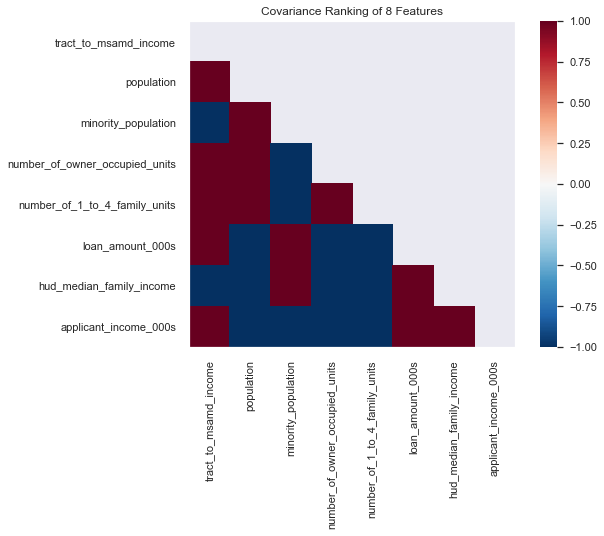

In [71]:
# Instantiate the visualizer with the Covariance ranking algorithm 
visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

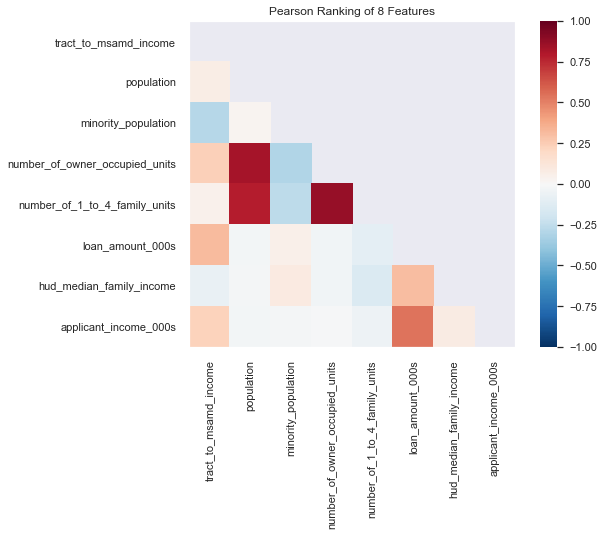

In [72]:
# Instantiate the visualizer with the Pearson ranking algorithm 
visualizer = Rank2D(features=features, algorithm='pearson')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

### Joint Plot
The JointPlotVisualizer plots a feature against the target and shows the distribution of each via a histogram on each axis.

In [73]:
# Specify the feature and target variables
feature = 'hud_median_family_income'
target = 'action_taken'

# Extract the instance data and the target
X = dataset[feature]
y = dataset[target]

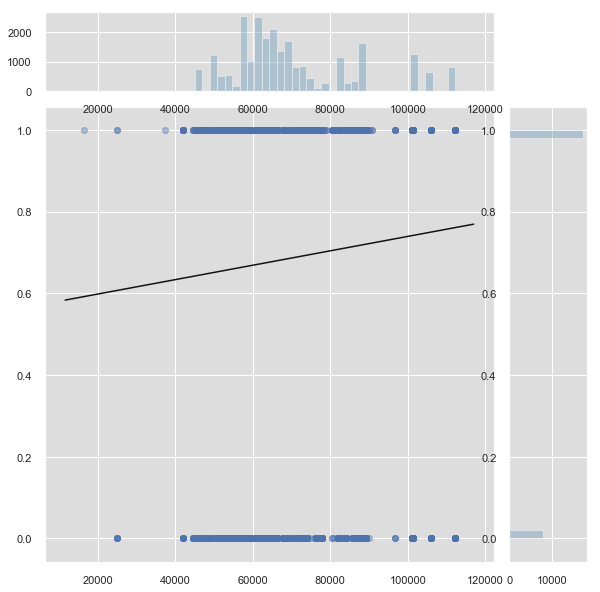

In [74]:
# Instantiate the visualizer
visualizer = JointPlotVisualizer(feature=feature, target=target)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.poof()         # Draw/show/poof the data

### Classification Report

The classification report visualizer displays the precision, recall, and F1 scores for the model. Integrates numerical scores as well color-coded heatmap in order for easy interpretation and detection.

In [75]:
# Classifier Evaluation Imports 

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split


from yellowbrick.classifier import ClassificationReport, ConfusionMatrix, DiscriminationThreshold

In [76]:
# Specify the features of interest and the classes of the target 
features = ['tract_to_msamd_income', 'population', 'minority_population', 'number_of_owner_occupied_units', 
    'number_of_1_to_4_family_units', 'loan_amount_000s', 'hud_median_family_income', 
    'applicant_income_000s']

classes = [0, 1]

# Extract the numpy arrays from the data frame 
X = dataset[features].as_matrix()
y = dataset.action_taken.as_matrix()

# Create the train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

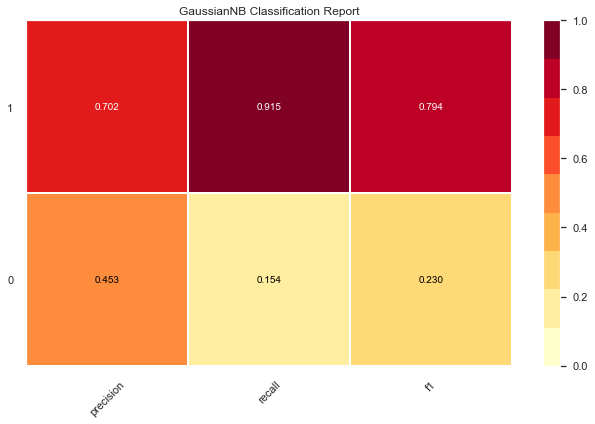

In [77]:
#Instantiate the classification model and visualizer 
bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

### Confusion Matrix

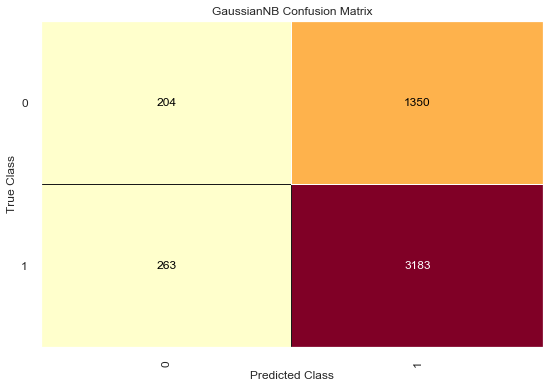

In [49]:
# Instantiate the classification model and visualizer 
bayes = GaussianNB()
visualizer = ConfusionMatrix(bayes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

### Discrimination Threshold

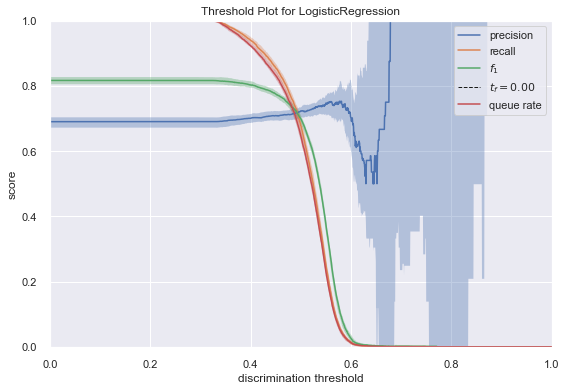

In [78]:
# Instantiate the classification model and visualizer
logistic = LogisticRegression(class_weight="balanced")
visualizer = DiscriminationThreshold(logistic)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.poof()     # Draw/show/poof the data
